# Plots

In [10]:
import determined as det
from collections import defaultdict
from determined.experimental import client
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize": (7.5, 7.5)})


Get all projects in the workspace

In [54]:
workspace = client.get_workspace("TP Blog Post")
projects_dict = {p.name: p for p in workspace.list_projects()}
for p in projects_dict:
    print(p)

MLP TP Profiling
Matmul Profiling


## mlp_tp Plots

In [55]:
matmul_trial = projects_dict["Matmul Profiling"].list_experiments()[0].list_trials()[0]

In [56]:
matmul_results_dict = defaultdict(list)
for m in matmul_trial.iter_metrics("matmul"):
    matmul_results_dict["d_model"].append(m.metrics["d_model"])
    matmul_results_dict["TFLOP/sec/GPU"].append(m.metrics["tflop_s_gpu"])
    matmul_results_dict["TFLOP/sec/GPU_std"].append(m.metrics["tflop_s_gpu_std"])
matmul_results_df = pd.DataFrame.from_dict(matmul_results_dict)
matmul_results_df

,d_model,TFLOP/sec/GPU,TFLOP/sec/GPU_std
0,256,1.043684,0.065087
1,512,8.508206,1.398408
2,768,29.999840,1.571498
3,1024,49.371681,3.053242
4,1280,111.730354,4.155525
...,...,...,...
59,15360,267.599518,2.319973
60,15616,268.269440,2.898224
61,15872,267.012878,4.683553
62,16128,267.320831,4.209327


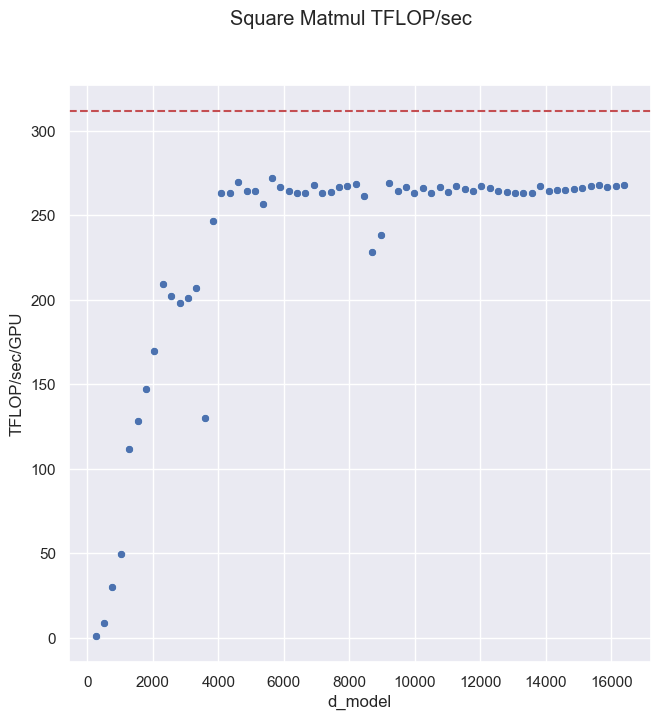

In [73]:
matmul_plot = sns.scatterplot(matmul_results_df, x="d_model", y="TFLOP/sec/GPU")
plt.suptitle("Square Matmul TFLOP/sec")
matmul_plot.axhline(y=312, color="r", linestyle="--")
matmul_plot.figure.savefig("matmul.png", dpi=256, bbox_inches="tight")

## MLP TP Plots

In [74]:
mlp_tp_trial = projects_dict["MLP TP Profiling"].list_experiments()[0].list_trials()[0]

In [80]:
mlp_tp_results_dict = defaultdict(list)
for group in (f"tp_degree_{n}" for n in (1, 2, 4, 8)):
    for m in mlp_tp_trial.iter_metrics(group):
        mlp_tp_results_dict["tp_degree"].append(m.metrics["tp_degree"])
        mlp_tp_results_dict["d_model"].append(m.metrics["d_model"])
        mlp_tp_results_dict["time_s"].append(m.metrics["time_s"])
        mlp_tp_results_dict["TFLOP/sec/GPU"].append(m.metrics["tflop_s_gpu"])
        mlp_tp_results_dict["TFLOP/sec/GPU_std"].append(m.metrics["tflop_s_gpu_std"])
mlp_tp_results_df = pd.DataFrame.from_dict(mlp_tp_results_dict)
mlp_tp_results_df

,tp_degree,d_model,time_s,TFLOP/sec/GPU,TFLOP/sec/GPU_std
0,1,1024,0.000491,139.835892,1.208936
1,1,1536,0.000961,160.913666,0.919665
2,1,2048,0.001656,165.990097,0.204373
3,1,2560,0.002080,206.526718,4.208575
4,1,3072,0.002965,208.659897,2.857500
...,...,...,...,...,...
119,8,14336,0.008191,205.556244,1.832598
120,8,14848,0.008675,208.195099,1.696985
121,8,15360,0.009086,212.753281,2.861620
122,8,15872,0.009951,207.430328,2.573814


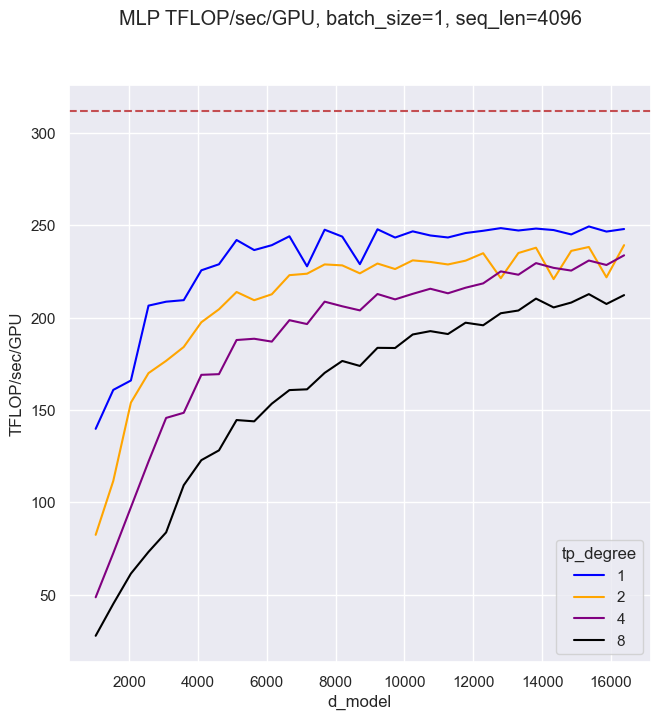

In [81]:
mlp_tp_plot = sns.lineplot(mlp_tp_results_df,
                           x="d_model",
                           y="TFLOP/sec/GPU",
                           hue="tp_degree",
                           palette=["blue", "orange", "purple",
                                    "black"])
plt.suptitle("MLP TFLOP/sec/GPU, batch_size=1, seq_len=4096")
mlp_tp_plot.axhline(y=312, color="r", linestyle="--")
mlp_tp_plot.figure.savefig("mlp_tp.png", dpi=256, bbox_inches="tight")